### Importing the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix

###   Importing and reading the data

In [2]:
df_leads = pd.read_csv("Leads.csv")
# Reading the data
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Checking the number of rows and columns by using len

In [3]:
rows = len(df_leads.axes[0])
cols = len(df_leads
           .axes[1])
  
# Print the number of rows and columns
print("Number of Rows: " + str(rows))
print("Number of Columns: " + str(cols))

Number of Rows: 9240
Number of Columns: 37


### We can also check number of rows and columns also by using shape¶

In [4]:
df_leads.shape

(9240, 37)

### Checking the data type for analysis

In [5]:
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Duplicates check in Prospect ID columns and Lead Number:
df_leads.duplicated(subset = ['Prospect ID'], keep = False).sum()

0

In [8]:
df_leads.duplicated(subset = ['Lead Number'], keep = False).sum()

0

#### Insights: Since there are no duplicates in both the columns, these columns can be dropped as they only indicate the ID number of the people who were contacted and can be dropped

#### Checking the missing values

In [9]:
# Dropping Lead Number and Prospect ID as they have unique values:
df_leads.drop(['Prospect ID','Lead Number'], axis=1, inplace=True)

In [10]:
# Converting select values to 'NaN':
df_leads= df_leads.replace('Select', np.nan)

In [11]:
# Null values check:
df_leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [12]:
# Converting nulls in percentage:
round(100*(df_leads.isnull().sum())/len(df_leads.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [13]:
# Dropping all the columns with more than 40% as null percentage:
df_leads.drop(['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)

In [14]:
# Checking of null counts percentage again:
round(100*(df_leads.isnull().sum())/len(df_leads.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [15]:
#Checking unique data:
df_leads.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

In [16]:
# Dropping unique valued columns:
df_leads.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)


In [17]:
# Percentage of Null:
round(100*(df_leads.isnull().sum())/len(df_leads.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

## Data Preparation

#### Variable analysis

In [18]:
# Analyzing the City variable:
df_leads.City.value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [19]:
# Dropping the City column as most of the entries are of Mumbai.
cols_to_drop =['City']

In [20]:
# Specialization:
df_leads.Specialization.value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [21]:
# Grouping all Management specializations together because they show similar trends:
df_leads['Specialization'] = df_leads['Specialization'].replace(['Supply Chain Management','IT Projects Management',
                                                                     'Finance Management','Human Resource Management',
                                                                    'Marketing Management','Operations Management','Retail Management',
                                                                     'Hospitality Management','Healthcare Management'],'Management Specializations')
df_leads['Specialization'] = df_leads['Specialization'].replace(np.nan,'Not Specified')

In [22]:
# Tags:
df_leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [23]:
# Grouping values with low count in order to remove bias
df_leads['Tags'] =df_leads['Tags'].replace(np.nan,'Not Specified')
df_leads['Tags'] = df_leads['Tags'].replace(['Recognition issue (DEC approval)', 'Shall take in the next coming month', 
                                      'University not recognized', 'Lateral student',
                                       'In confusion whether part time or DLP', 'Interested in Next batch, Still Thinking',
                                       'Want to take admission but has financial problems', 'Lost to Others',
                                      'in touch with EINS', 'number not provided', 'opp hangup', 'wrong number given',
                                      'Diploma holder (Not Eligible)', 'invalid number', 'Graduation in progress',
                                      'Interested  in full time MBA', 'Not doing further education', 'Lost to EINS', 'Busy',
                                      'switched off'], 'Other Tags')

In [24]:
# What matters most to you in choosing a course:
df_leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [25]:
# Dropping What matters most to you in choosing a course column since it has high null values and majority of them are Better Career Prospects.
cols_to_drop.append('What matters most to you in choosing a course')

In [26]:

# What is your current occupation:
df_leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [27]:
# Grouping all the low frequency data as Others and 
df_leads['What is your current occupation'] = df_leads['What is your current occupation'].replace(np.nan,'Not Specified')
df_leads['What is your current occupation'] = df_leads['What is your current occupation'].replace(['Housewife', 'Businessman'],
                                                                                           'Other')

In [28]:
# Country:
df_leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [29]:
# Dropping Country column since, more than 90% values are India or NA only:
cols_to_drop.append('Country')

In [30]:
# Lead Source:
df_leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [31]:
 # Grouping the data:
df_leads['Lead Source'] = df_leads['Lead Source'].replace([np.nan,'google'], 'Google')
df_leads['Lead Source'] = df_leads['Lead Source'].replace('Facebook','Social Media')
df_leads['Lead Source'] = df_leads['Lead Source'].replace(['bing','Click2call','Press_Release','Social Media','Live Chat',
                                                             'youtubechannel','testone','Pay per Click Ads','welearnblog_Home',
                                                             'WeLearn','blog','NC_EDM'],'Others')

In [32]:
# Last Activity
df_leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [33]:
# Do not call:
df_leads['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [34]:
#Dropping the column Do Not Call as it has more No's than yes abd it might hamper our analysis.
cols_to_drop.append('Do Not Call')

In [35]:
# Last Activity
df_leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [36]:
# Replacing the NA values and other less occuring entries as Others:
df_leads['Last Activity'] = df_leads['Last Activity'].replace(np.nan, 'Email Opened')
df_leads['Last Activity'] = df_leads['Last Activity'].replace(['Visited Booth in Tradeshow', 'Resubscribed to emails',
                                                        'Email Marked Spam', 'Email Received',
                                                         'View in browser link Clicked', 'Approached upfront',
                                                         'Had a Phone Conversation', 'Unsubscribed', 'Unreachable'],
                                                        'Others')

In [37]:
# Do Not Email:
df_leads['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [38]:
# Search:
df_leads.Search.value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [39]:
# Adding the column to our drop column list:
cols_to_drop.append('Search')

In [40]:
# Newspaper Article:
df_leads['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [41]:
# Adding the column to our drop column list:
cols_to_drop.append('Newspaper Article')

In [42]:
# X Education Forums:
df_leads['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [43]:
# Adding the column to our drop columns list:
cols_to_drop.append('X Education Forums')

In [44]:
# Newspaper:
df_leads.Newspaper.value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [45]:
# Adding the column to out drop column list:
cols_to_drop.append('Newspaper')

In [46]:
# Digital Advertisement:
df_leads['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [47]:
# Adding the column to our drop column list:
cols_to_drop.append('Digital Advertisement')

In [48]:
# Through Recommendations:
df_leads['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [49]:
# Adding the column to our drop columns list:
cols_to_drop.append('Through Recommendations')

In [50]:
# A free copy of Mastering The Interview:
df_leads['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [51]:
# Last Notable Activity:
df_leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [52]:
# Grouping all the low frequency groups together as Others:
df_leads['Last Notable Activity'] = df_leads['Last Notable Activity'].replace(['Email Marked Spam','Approached upfront',
                                                                                  'Resubscribed to emails','View in browser link Clicked',
                                                                                  'Form Submitted on Website','Email Received'],'Others')

In [53]:
# Total Visits:
df_leads.TotalVisits.describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [54]:
# Replacing all the NaN values with median:
df_leads['TotalVisits'] = df_leads['TotalVisits'].replace(np.nan, df_leads['TotalVisits'].median())

In [55]:
# Page Views Per Visit:
df_leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [56]:
# Replacing all the NaN values with median:
df_leads['Page Views Per Visit'] = df_leads['Page Views Per Visit'].replace(np.nan, df_leads['Page Views Per Visit'].median())

In [57]:
# Dropping the redundant columns:
df_leads = df_leads.drop(cols_to_drop,axis=1)

In [58]:
# Checking info:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

## Performing the Univariate Analysis 

In [59]:
# Recalling the columns for analysis:
df_leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [60]:
# Defining a function to ease the process of plotting and visualizations :
def plots(var1,var2,leads_data):
    plt.figure(figsize=(9,4))
    sns.countplot(x=var1,hue=var2, data=leads_data , palette = 'afmhot').tick_params(axis='x', rotation = 90)
    plt.show()

###  1. Lead Origin

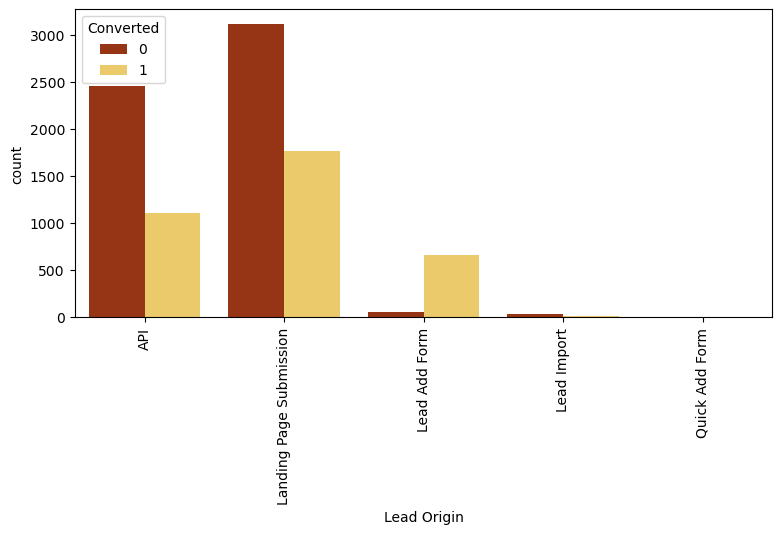

In [61]:
# Plotting the Lead Origin column with respect to the target column that is Converted:
plots('Lead Origin','Converted',df_leads)


#### Insights:
-  Customers identified from Lead Add Form have the highest conversion rate as compared to other Lead Origins
-  Highest positive conversion rate is of tags 'Will revert after reading the mail' and 'Closed by Horizon'.

### 2. Do Not Email:


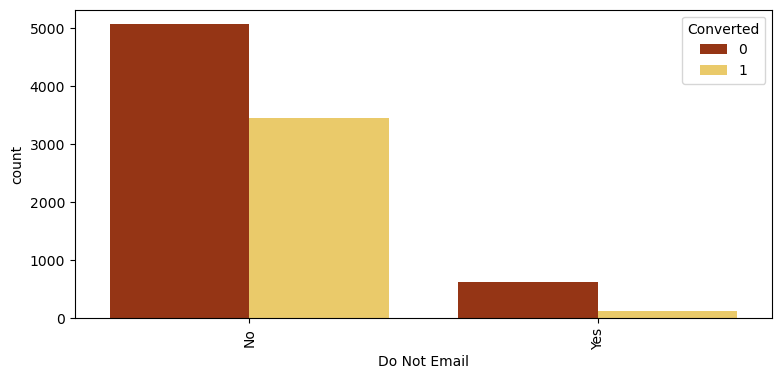

In [62]:
# Plotting the Do Not Email column with respect to the target column that is Converted:
plots('Do Not Email','Converted',df_leads)

### Insights: 
People who do not want to receive emails and people who want to receive emails both have high negative conversion rates

### 3.Lead Source

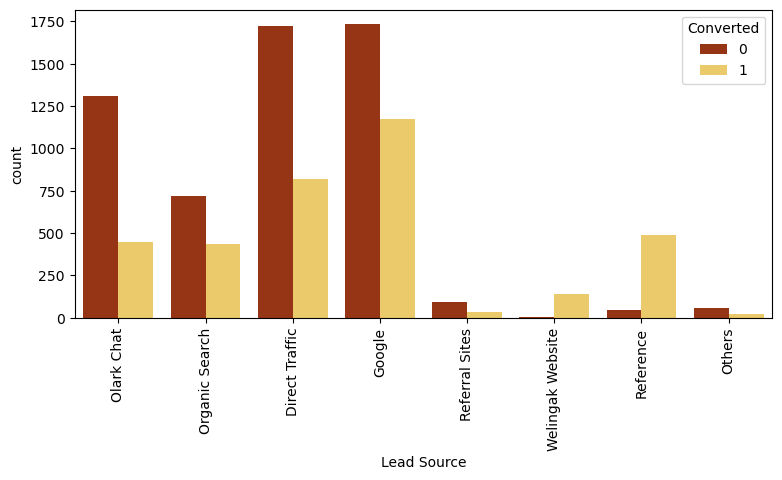

In [63]:
# Plotting the Lead Source column with respect to the target column that is Converted:
plots('Lead Source','Converted',df_leads)

#### Insights: 
-  Reference shows good positive conversion rate.
-  Direct traffic and Google have highest negative conversion rate.

### 4. Specialization

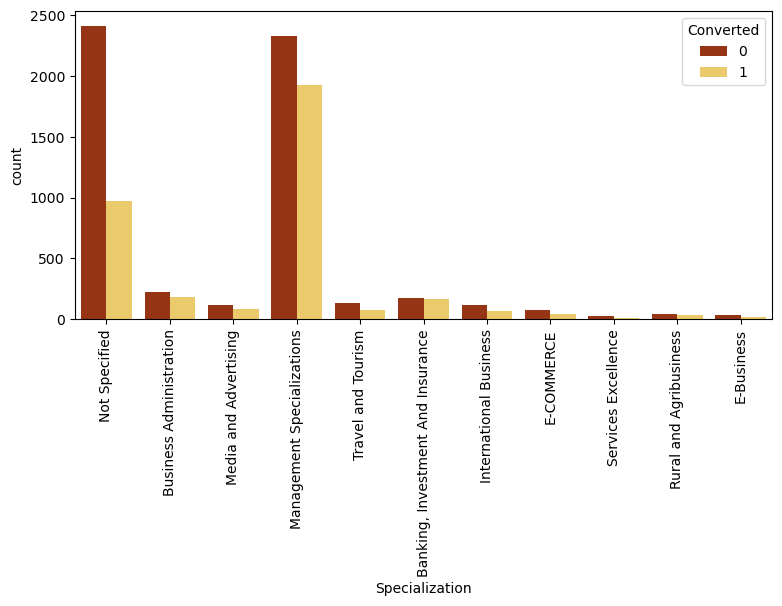

In [64]:
# Plotting the Specialization column with respect to the target column that is Converted:
plots('Specialization','Converted',df_leads)

#### Insights
-  Lowest positive conversion rate is of customers who specializes in Services Excellence.
-  Highest positive conversion rate is of customers who specializes in Management

### 5.  Last Activity

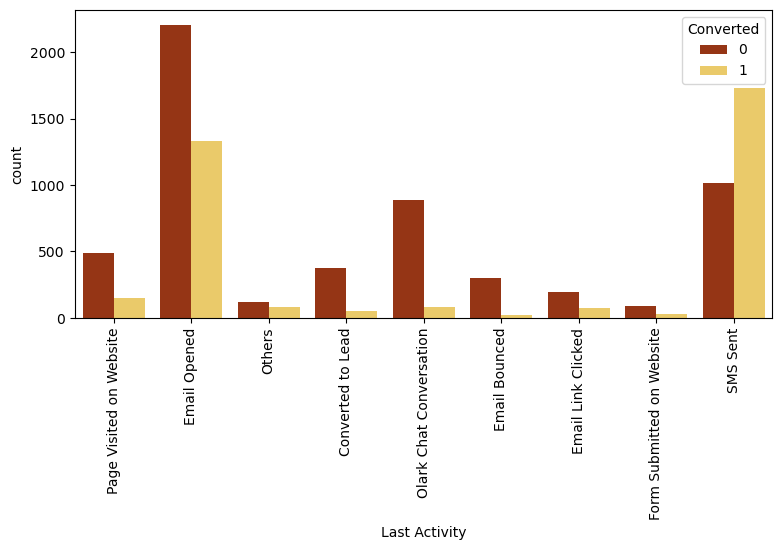

In [65]:
# Plotting the Last Activity column with respect to the target column that is converted:
plots('Last Activity','Converted',df_leads)

#### Insights:
- Last activity performed by customers is SMS sent , since it has the highest positive conversion rate.

### 6. What is your current occupation?

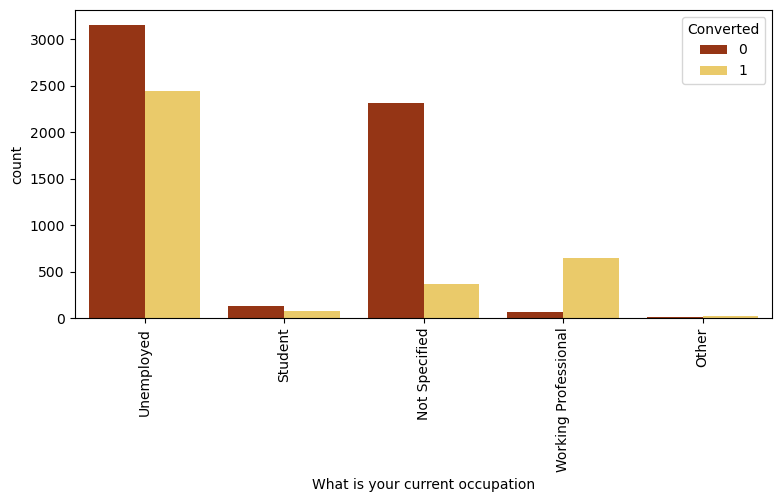

In [67]:
# Plotting the What is your current occupation column with respect to the target column that is Converted:
plots('What is your current occupation','Converted',df_leads)

#### Insights:
- Highest negative conversion rate is of unemployed customers.

### 7. Tags

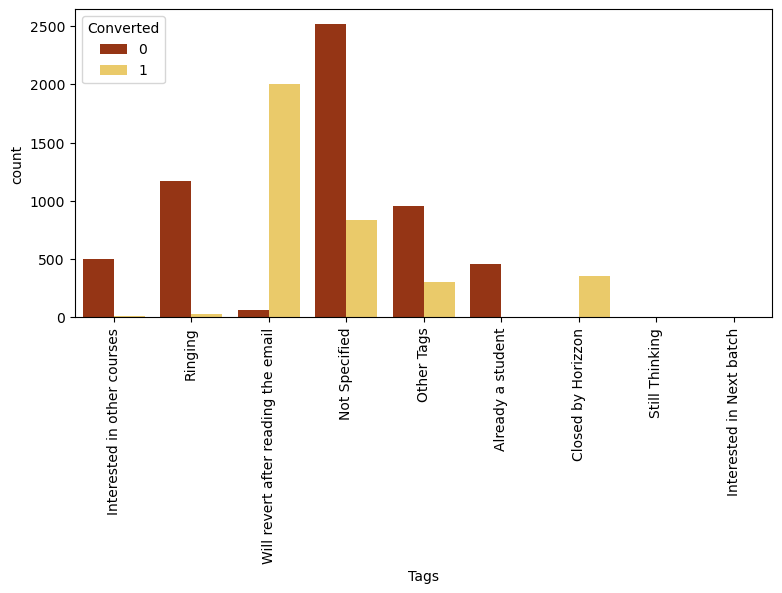

In [69]:
# Plotting the Tags column with respect to the target column that is Converted:
plots('Tags','Converted',df_leads)

#### Insights:
-  Negative conversion rate is of tags 'Ringing', 'Not specified' and 'Other tags'.
-  Positive conversion rate is of tags 'Will revert after reading the email' and 'Closed by Horizon'

### 8. LAST NOTABLE ACTIVITY:

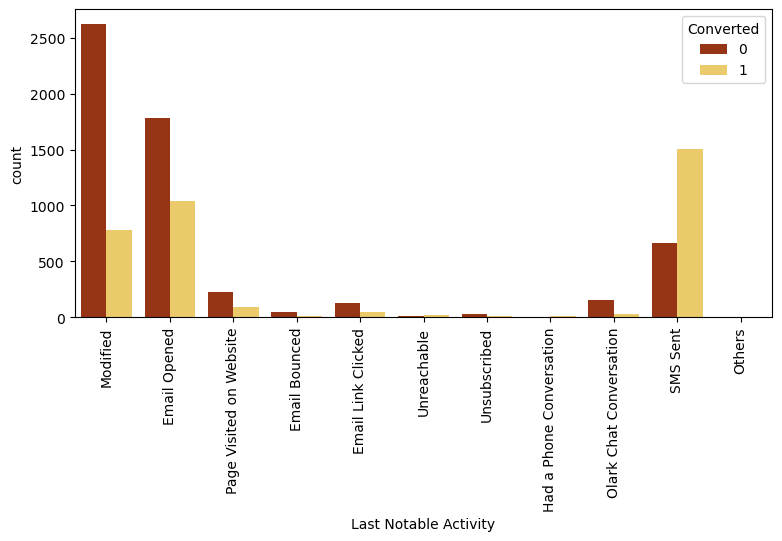

In [70]:
# Plotting the Last Notable Activity column with respect to the target column that is Converted:
plots('Last Notable Activity','Converted',df_leads)

#### Insights: 
-  Out of all the activities present the highest conversion rate is of Activity SMS and highest negative is of Modified

## Numerical Variables Analysis

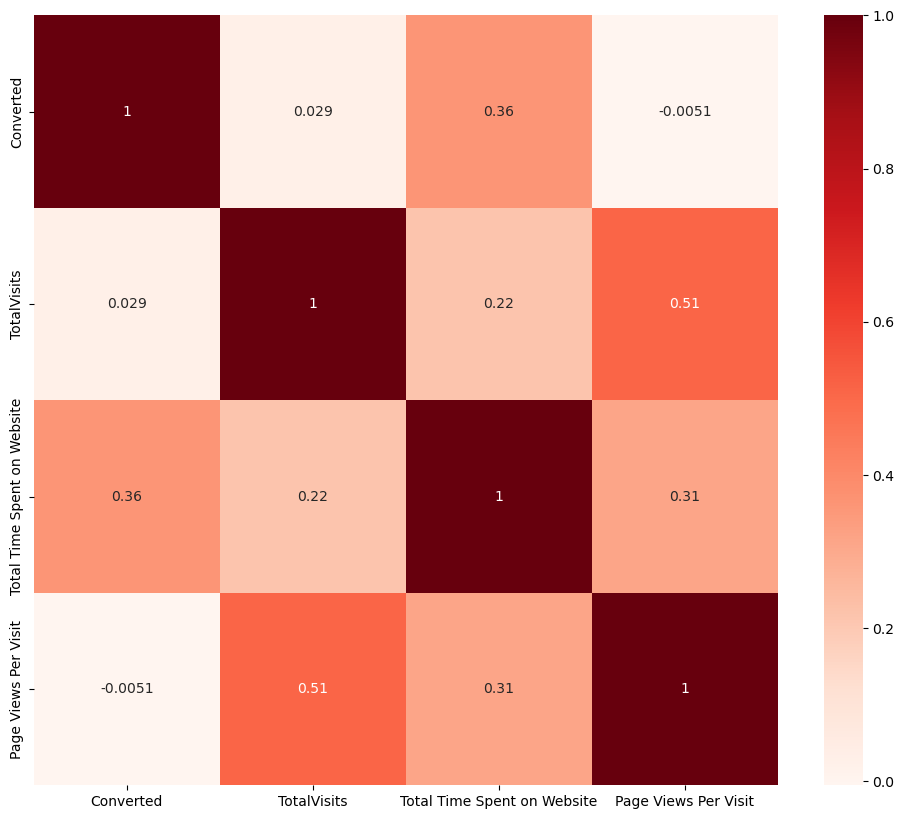

In [72]:
# Checking correlation among variables:
plt.figure(figsize=(12,10))
sns.heatmap(df_leads.corr(),annot=True,cmap='Reds')
plt.show()

#### Insights:
    -  According to the above heat map the target variable Converted and Page Views Per Visit have highest corelation

### OUTLIER TREATMENT:

#### 1. TOTAL TIME SPENT ON WEBSITE:

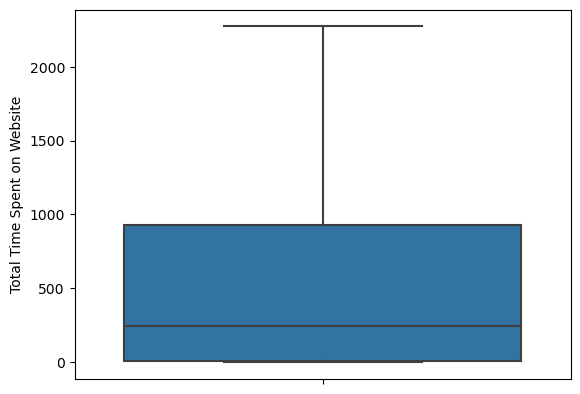

In [201]:
# Creating boxplot for Total Time Spent on Website:
sns.boxplot(y ='Total Time Spent on Website',data= df_leads)
plt.show()

#### Insight:
-  There are no possible outliers to treat.

#### 2. TOTAL VISITS:

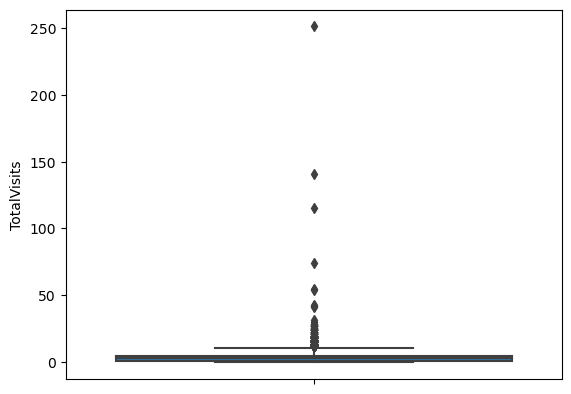

In [75]:
#  Creating boxplot for TotalVisits:
sns.boxplot(y= 'TotalVisits', data= df_leads)
plt.show()

In [76]:
# Describing the TotalVisits column:
df_leads.TotalVisits.describe(percentiles=[0.10,0.25,0.50,0.75,0.99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
10%         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [77]:
# By removing top 1% treating the outliers:
df_leads = df_leads[(df_leads['TotalVisits']<=df_leads['TotalVisits'].quantile(0.99))]

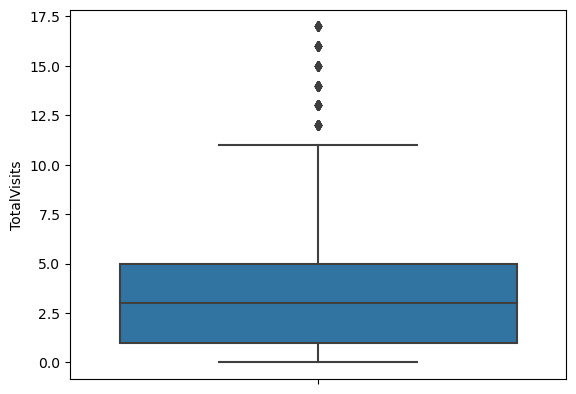

In [78]:
# Visualizing the boxplot again:
sns.boxplot(y= 'TotalVisits', data= df_leads)
plt.show()

#### 3. PAGE VIEW PER VISIT:

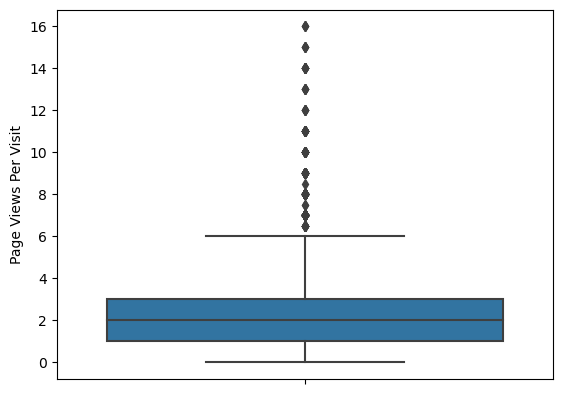

In [79]:
# Creating boxplot for Page Views Per Visit:
sns.boxplot(y= 'Page Views Per Visit', data= df_leads)
plt.show()

In [80]:
# Describing the Page Views Per Visit column:
df_leads['Page Views Per Visit'].describe(percentiles=[0.10,0.25,0.50,0.75,0.99])

count    9157.000000
mean        2.332225
std         2.047285
min         0.000000
10%         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

In [81]:
# Treating outliers by removing top 1%:
df_leads = df_leads[(df_leads['Page Views Per Visit']<= df_leads['Page Views Per Visit'].quantile(0.99))]

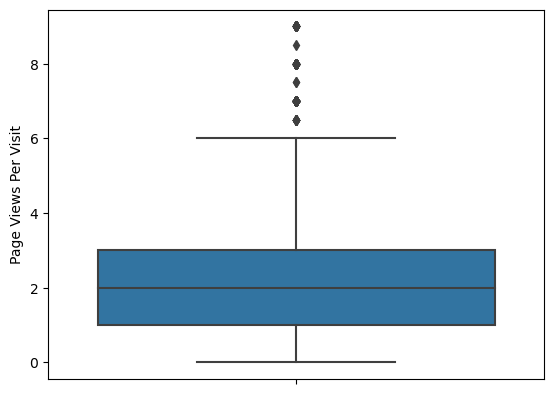

In [82]:
# Visualizing the boxplot again:
sns.boxplot(y = 'Page Views Per Visit', data= df_leads)
plt.show()

### Plotting Numerical Variables:

In [83]:
def box(var):
    sns.boxplot(y=var, x='Converted',data=df_leads)
    plt.show()

#### 1. TOTAL TIME SPENT ON WEBSITE:

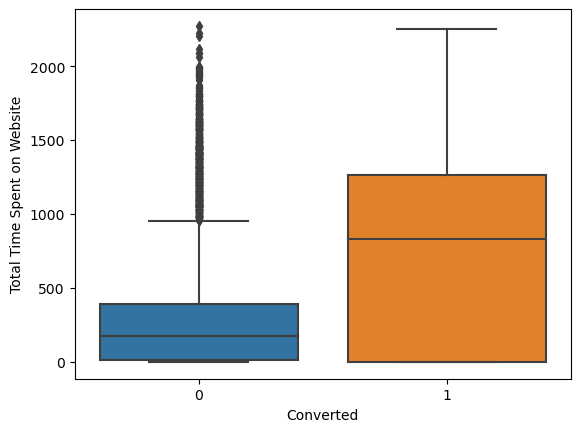

In [202]:
box('Total Time Spent on Website')

-  <b> Leads spending more time on the website tend to be converted<b>

#### 2. TOTAL VISITS:

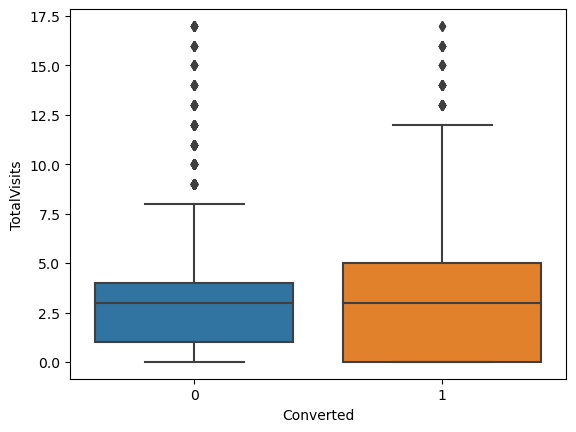

In [203]:
box('TotalVisits')

#### Insights: 
 - <b>Median of both the plots are similar to get the appropiate inference.<b>

#### 3. PAGE VIEWS PER VISIT:

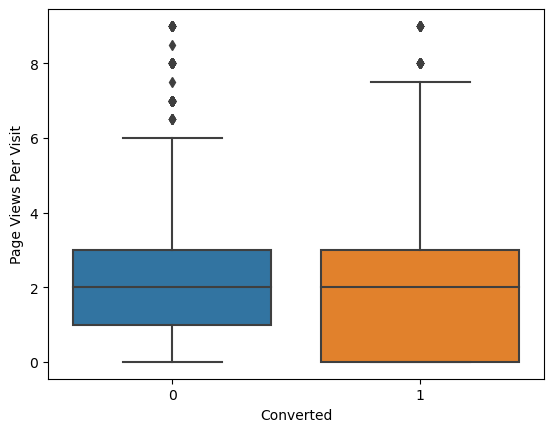

In [89]:
box('Page Views Per Visit')

### Binary Mapping:

In [91]:
# Converting Yes/No into 1/0 to fit the model:
def binary_map(x):
    return x.map({ 'Yes':1 , 'No':0})

vars = ['Do Not Email','A free copy of Mastering The Interview']

In [92]:
# Applying the funtion defined:
df_leads[vars] = df_leads[vars].apply(binary_map)

In [93]:

df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,0,Modified


### Dummy Variable:

In [95]:
# Categorical columns checking:
cat_cols = df_leads.select_dtypes(include = 'object').columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Last Notable Activity'],
      dtype='object')

In [96]:
# Checking the value_counts:
df_leads['Lead Origin'].value_counts()

Landing Page Submission    4769
API                        3548
Lead Add Form               717
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [97]:
# Dummy variable creation for Lead Origin:
Lead_Origin = pd.get_dummies(df_leads['Lead Origin'], prefix = 'Lead_Origin')
Lead_Origin = Lead_Origin.drop('Lead_Origin_Quick Add Form', axis = 1)
df_leads = pd.concat([df_leads, Lead_Origin], axis = 1)

In [98]:
# Checking the value_counts:
df_leads['Lead Source'].value_counts()

Google              2877
Direct Traffic      2499
Olark Chat          1753
Organic Search      1092
Reference            533
Welingak Website     142
Referral Sites       117
Others                77
Name: Lead Source, dtype: int64

In [99]:
# Dummy variable creation for Lead Source:
Lead_Source = pd.get_dummies(df_leads['Lead Source'], prefix = 'Lead_Source')
Lead_Source = Lead_Source.drop('Lead_Source_Others', axis = 1)
df_leads = pd.concat([df_leads, Lead_Source], axis = 1)

In [100]:
# Checking the value_counts:
df_leads['Last Activity'].value_counts()

Email Opened                 3493
SMS Sent                     2707
Olark Chat Conversation       967
Page Visited on Website       594
Converted to Lead             428
Email Bounced                 324
Email Link Clicked            264
Others                        199
Form Submitted on Website     114
Name: Last Activity, dtype: int64

In [101]:
# Dummy variable creation for Lead Source:
Last_Activity = pd.get_dummies(df_leads['Last Activity'], prefix = 'Last_Activity')
Last_Activity = Last_Activity.drop('Last_Activity_Others', axis = 1)
df_leads = pd.concat([df_leads, Last_Activity], axis = 1)

In [102]:
# Checking value_counts:
df_leads['Specialization'].value_counts()

Management Specializations           4175
Not Specified                        3360
Business Administration               394
Banking, Investment And Insurance     328
Media and Advertising                 198
Travel and Tourism                    190
International Business                173
E-COMMERCE                            108
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    38
Name: Specialization, dtype: int64

In [103]:
# Dummy variable creation for Specialization:
Special = pd.get_dummies(df_leads['Specialization'], prefix = 'Specialization')
Special = Special.drop('Specialization_Not Specified', axis = 1)
df_leads = pd.concat([df_leads, Special], axis = 1)

In [104]:
# Checking value_counts:
df_leads['What is your current occupation'].value_counts()

Unemployed              5508
Not Specified           2650
Working Professional     694
Student                  207
Other                     31
Name: What is your current occupation, dtype: int64

In [105]:
# Dummy variable creation for What is your current occupation:
occup = pd.get_dummies(df_leads['What is your current occupation'], prefix = 'Occupation')
occup = occup.drop('Occupation_Other', axis = 1)
df_leads = pd.concat([df_leads, occup], axis = 1)

In [106]:
# Checking value_counts:
df_leads['Tags'].value_counts()

Not Specified                          3304
Will revert after reading the email    2039
Other Tags                             1243
Ringing                                1176
Interested in other courses             509
Already a student                       461
Closed by Horizzon                      347
Still Thinking                            6
Interested in Next batch                  5
Name: Tags, dtype: int64

In [107]:
# Creating dummy variables for Tags:
tags = pd.get_dummies(df_leads['Tags'], prefix = 'Tags')
tags = tags.drop('Tags_Not Specified', axis = 1)
df_leads = pd.concat([df_leads, tags], axis = 1)

In [108]:
# Checking value_counts:
df_leads['Last Notable Activity'].value_counts()

Modified                    3361
Email Opened                2789
SMS Sent                    2143
Page Visited on Website      288
Olark Chat Conversation      182
Email Link Clicked           170
Email Bounced                 59
Unsubscribed                  46
Unreachable                   32
Had a Phone Conversation      13
Others                         7
Name: Last Notable Activity, dtype: int64

In [109]:
# Last Notable Activity
act = pd.get_dummies(df_leads['Last Notable Activity'], prefix = 'Last_Notable_Activity')
act = act.drop('Last_Notable_Activity_Others', axis = 1)
df_leads = pd.concat([df_leads, act], axis = 1)

In [110]:
# Displaying the head:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,...,0,0,0,0,1,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,...,0,0,1,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,...,0,0,0,0,1,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,...,0,0,0,0,1,0,0,0,0,0


### Dropping of Repeated Variable:

In [112]:
df_leads = df_leads.drop(cat_cols, axis = 1)

In [113]:
df_leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,...,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed
0,0,0,0.0,0,0.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,5.0,674,2.5,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


### Train-Test Split:

In [115]:
# Keeping the target variable 'Converted' in y and rest in X:
y = df_leads['Converted']
X = df_leads.drop('Converted', axis = 1)

In [116]:
# Specifying X_train, X_test, y_train, y_test:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.70, random_state= 100)

In [117]:
# Checking head:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,...,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed
302,0,7.0,250,2.33,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6087,1,0.0,0,0.00,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1033,0,5.0,470,5.00,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7656,1,6.0,352,6.00,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3241,0,4.0,973,1.33,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### Feature Scaling:

In [119]:
# Scaling the Numerical variables
scaler = StandardScaler()
num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,...,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed
302,0,1.336782,-0.428736,0.044021,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6087,1,-1.094877,-0.887355,-1.206716,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1033,0,0.642022,-0.025151,1.477269,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7656,1,0.989402,-0.241619,2.014065,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3241,0,0.294642,0.897591,-0.492776,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### BUILDING OF MODEL:

### MODEL 1:

In [121]:
# Model building using statsmodels

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           56
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1396.0
Date:                Sun, 18 Jun 2023   Deviance:                       2792.1
Time:                        13:16:36   Pearson chi2:                 7.83e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.5897
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               24.9297   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Do Not Email                                        -1.3181      0.274     -4.810      0.000      -1.855      -0.781
TotalVisits                                          0.2565      0.075      3.437      0.001       0.110       0.403
Total Time Spent on Website                          1.0903      0.058     18.923      0.000       0.977       1.203
Page Views Per Visit                                -0.3203      0.086     -3.728      0.000      -0.489      -0.152
A free copy of Mastering The Interview              -0.0508      0.160     -0.317      0.751      -0.365       0.263
Lead_Origin_API                                    -21.5220   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead_Origin_Landing Page Submission                -21.7238   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead_Origin_Lead Add Form                          -18.6824   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead_Origin_Lead Import                            -22.0839   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead_Source_Direct Traffic                          -0.2803      0.977     -0.287      0.774      -2.194       1.634
Lead_Source_Google                                  -0.2599      0.971     -0.268      0.789      -2.162       1.642
Lead_Source_Olark Chat                               0.6084      0.984      0.618      0.537      -1.321       2.538
Lead_Source_Organic Search                          -0.6874      0.983     -0.699      0.484      -2.613       1.239
Lead_Source_Reference                               -1.8597      1.406     -1.323      0.186      -4.616       0.896
Lead_Source_Referral Sites                          -0.1365      1.068     -0.128      0.898      -2.230       1.957
Lead_Source_Welingak Website                         2.1128      1.704      1.240      0.215      -1.227       5.453
Last_Activity_Converted to Lead                     -0.0869      0.634     -0.137      0.891      -1.329       1.156
Last_Activity_Email Bounced                         -0.7442      0.817     -0.911      0.362      -2.346       0.857
Last_Activity_Email Link Clicked                     0.1920      0.780      0.246      0.805      -1.336       1.720
Last_Activity_Email Opened                           0.6941      0.600      1.158      0.247      -0.481       1.869
Last_Activity_Form Submitted on Website              0.3245      0.696      0.466      0.641      -1.040       1.689
Last_Activity_Olark Chat Conversation               -0.4324      0.617     -0.700      0.484      -1.642       0.777
Last_Activity_Page Visited on Website    

### Feature Selection Using RFE:

In [123]:
# Logistic Regression
logreg = LogisticRegression()

rfe = RFE(logreg,n_features_to_select =20)             
rfe = rfe.fit(X_train, y_train)

In [124]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('A free copy of Mastering The Interview', False, 34),
 ('Lead_Origin_API', False, 9),
 ('Lead_Origin_Landing Page Submission', False, 8),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', False, 10),
 ('Lead_Source_Direct Traffic', False, 26),
 ('Lead_Source_Google', False, 27),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', False, 13),
 ('Lead_Source_Reference', False, 5),
 ('Lead_Source_Referral Sites', False, 28),
 ('Lead_Source_Welingak Website', True, 1),
 ('Last_Activity_Converted to Lead', False, 6),
 ('Last_Activity_Email Bounced', True, 1),
 ('Last_Activity_Email Link Clicked', False, 24),
 ('Last_Activity_Email Opened', False, 15),
 ('Last_Activity_Form Submitted on Website', False, 21),
 ('Last_Activity_Olark Chat Conversation', True, 1),
 ('Last_Activity_Page Visited on Website', True, 1),
 ('L

In [125]:
# Selected Variables
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead_Origin_Lead Add Form', 'Lead_Source_Olark Chat',
       'Lead_Source_Welingak Website', 'Last_Activity_Email Bounced',
       'Last_Activity_Olark Chat Conversation',
       'Last_Activity_Page Visited on Website', 'Last_Activity_SMS Sent',
       'Specialization_Travel and Tourism', 'Occupation_Not Specified',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Other Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last_Notable_Activity_Email Link Clicked',
       'Last_Notable_Activity_Modified',
       'Last_Notable_Activity_Olark Chat Conversation'],
      dtype='object')

In [126]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead_Origin_API',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Import',
       'Lead_Source_Direct Traffic', 'Lead_Source_Google',
       'Lead_Source_Organic Search', 'Lead_Source_Reference',
       'Lead_Source_Referral Sites', 'Last_Activity_Converted to Lead',
       'Last_Activity_Email Link Clicked', 'Last_Activity_Email Opened',
       'Last_Activity_Form Submitted on Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence', 'Occupation_Student',
       'Occupation_Unemployed', 'Occupation_Working Professional',
  

### MODEL 2:

In [127]:

X_train_sm = sm.add_constant(X_train[col])

logm2 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1431.8
Date:                Sun, 18 Jun 2023   Deviance:                       2863.6
Time:                        13:16:39   Pearson chi2:                 7.20e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5851
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.3124      0.137     -2.285      0.022      -0.580      -0.044
Do Not Email                                     -1.2051      0.247     -4.871      0.000      -1.690      -0.720
Total Time Spent on Website                       1.0898      0.056     19.569      0.000       0.981       1.199
Lead_Origin_Lead Add Form                         1.9366      0.329      5.895      0.000       1.293       2.581
Lead_Source_Olark Chat                            1.1974      0.144      8.308      0.000       0.915       1.480
Lead_Source_Welingak Website                      3.5764      1.072      3.335      0.001       1.475       5.678
Last_Activity_Email Bounced                      -0.9151      0.498     -1.839      0.066      -1.891       0.060
Last_Activity_Olark Chat Conversation            -0.5137      0.254     -2.026      0.043      -1.011      -0.017
Last_Activity_Page Visited on Website            -0.3494      0.222     -1.571      0.116      -0.786       0.087
Last_Activity_SMS Sent                            1.4446      0.111     12.988      0.000       1.227       1.663
Specialization_Travel and Tourism                -1.0033      0.397     -2.529      0.011      -1.781      -0.226
Occupation_Not Specified                         -1.7715      0.140    -12.617      0.000      -2.047      -1.496
Tags_Already a student                           -4.4469      0.610     -7.294      0.000      -5.642      -3.252
Tags_Closed by Horizzon                           4.8998      0.737      6.652      0.000       3.456       6.343
Tags_Interested in other courses                 -3.5697      0.423     -8.447      0.000      -4.398      -2.741
Tags_Other Tags                                  -1.1042      0.151     -7.295      0.000      -1.401      -0.807
Tags_Ringing                                     -4.2056      0.249    -16.870      0.000      -4.694      -3.717
Tags_Will revert after reading the email          2.9387      0.195     15.047      0.000       2.556       3.322
Last_Notable_Activity_Email Link Clicked         -0.5199      0.359     -1.447      0.148      -1.224       0.184
Last_Notable_Activity_Modified                   -0.8752      0.118     -7.412      0.000      -1.107      -0.644
Last_Notable_Activity_Olark Chat Conversation    -1.0296      0.453     -2.273      0.023      -1.917      -0.142
=================================================================================================================
"""

In [128]:
# Dropping the variables with p-values greater than 0.05
col = col.drop(['Last_Activity_Email Bounced', 'Last_Activity_Page Visited on Website','Last_Notable_Activity_Email Link Clicked'])
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead_Origin_Lead Add Form', 'Lead_Source_Olark Chat',
       'Lead_Source_Welingak Website', 'Last_Activity_Olark Chat Conversation',
       'Last_Activity_SMS Sent', 'Specialization_Travel and Tourism',
       'Occupation_Not Specified', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Other Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last_Notable_Activity_Modified',
       'Last_Notable_Activity_Olark Chat Conversation'],
      dtype='object')

### MODEL 3

In [129]:
X_train_sm = sm.add_constant(X_train[col])

logm3 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6345
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1435.6
Date:                Sun, 18 Jun 2023   Deviance:                       2871.2
Time:                        13:16:40   Pearson chi2:                 7.11e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5846
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.3663      0.135     -2.712      0.007      -0.631      -0.102
Do Not Email                                     -1.4336      0.219     -6.549      0.000      -1.863      -1.005
Total Time Spent on Website                       1.0868      0.056     19.561      0.000       0.978       1.196
Lead_Origin_Lead Add Form                         1.9646      0.327      6.011      0.000       1.324       2.605
Lead_Source_Olark Chat                            1.1914      0.143      8.303      0.000       0.910       1.473
Lead_Source_Welingak Website                      3.5438      1.069      3.314      0.001       1.448       5.640
Last_Activity_Olark Chat Conversation            -0.4252      0.252     -1.689      0.091      -0.918       0.068
Last_Activity_SMS Sent                            1.5324      0.107     14.346      0.000       1.323       1.742
Specialization_Travel and Tourism                -1.0483      0.394     -2.661      0.008      -1.820      -0.276
Occupation_Not Specified                         -1.7811      0.140    -12.725      0.000      -2.055      -1.507
Tags_Already a student                           -4.4618      0.608     -7.335      0.000      -5.654      -3.270
Tags_Closed by Horizzon                           4.8560      0.734      6.617      0.000       3.418       6.294
Tags_Interested in other courses                 -3.5657      0.422     -8.445      0.000      -4.393      -2.738
Tags_Other Tags                                  -1.1115      0.151     -7.382      0.000      -1.407      -0.816
Tags_Ringing                                     -4.2174      0.250    -16.896      0.000      -4.707      -3.728
Tags_Will revert after reading the email          2.9274      0.194     15.090      0.000       2.547       3.308
Last_Notable_Activity_Modified                   -0.8982      0.117     -7.705      0.000      -1.127      -0.670
Last_Notable_Activity_Olark Chat Conversation    -1.0453      0.453     -2.309      0.021      -1.932      -0.158
=================================================================================================================
"""

In [130]:
### Checking VIF's:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Last_Notable_Activity_Modified,2.18
5,Last_Activity_Olark Chat Conversation,1.98
2,Lead_Origin_Lead Add Form,1.82
3,Lead_Source_Olark Chat,1.73
8,Occupation_Not Specified,1.62
14,Tags_Will revert after reading the email,1.62
6,Last_Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.37
16,Last_Notable_Activity_Olark Chat Conversation,1.37
10,Tags_Closed by Horizzon,1.32


In [131]:
# Dropping the variables with p-values greater than 0.05
col = col.drop('Last_Activity_Olark Chat Conversation')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead_Origin_Lead Add Form', 'Lead_Source_Olark Chat',
       'Lead_Source_Welingak Website', 'Last_Activity_SMS Sent',
       'Specialization_Travel and Tourism', 'Occupation_Not Specified',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Other Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last_Notable_Activity_Modified',
       'Last_Notable_Activity_Olark Chat Conversation'],
      dtype='object')

In [132]:
# Fourth model:
X_train_sm = sm.add_constant(X_train[col])

logm4 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6346
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1437.1
Date:                Sun, 18 Jun 2023   Deviance:                       2874.1
Time:                        13:16:40   Pearson chi2:                 7.24e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5844
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.3672      0.135     -2.720      0.007      -0.632      -0.103
Do Not Email                                     -1.4234      0.219     -6.486      0.000      -1.853      -0.993
Total Time Spent on Website                       1.0914      0.056     19.620      0.000       0.982       1.200
Lead_Origin_Lead Add Form                         1.9886      0.328      6.070      0.000       1.346       2.631
Lead_Source_Olark Chat                            1.1397      0.140      8.122      0.000       0.865       1.415
Lead_Source_Welingak Website                      3.5476      1.070      3.314      0.001       1.449       5.646
Last_Activity_SMS Sent                            1.5600      0.106     14.698      0.000       1.352       1.768
Specialization_Travel and Tourism                -1.0377      0.396     -2.623      0.009      -1.813      -0.262
Occupation_Not Specified                         -1.7851      0.140    -12.770      0.000      -2.059      -1.511
Tags_Already a student                           -4.4599      0.608     -7.337      0.000      -5.651      -3.269
Tags_Closed by Horizzon                           4.8830      0.734      6.651      0.000       3.444       6.322
Tags_Interested in other courses                 -3.5809      0.422     -8.493      0.000      -4.407      -2.754
Tags_Other Tags                                  -1.1072      0.151     -7.354      0.000      -1.402      -0.812
Tags_Ringing                                     -4.2312      0.250    -16.929      0.000      -4.721      -3.741
Tags_Will revert after reading the email          2.9359      0.194     15.120      0.000       2.555       3.316
Last_Notable_Activity_Modified                   -0.9748      0.109     -8.974      0.000      -1.188      -0.762
Last_Notable_Activity_Olark Chat Conversation    -1.4453      0.387     -3.737      0.000      -2.203      -0.687
=================================================================================================================
"""

In [133]:
# Checking VIF's:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last_Notable_Activity_Modified,1.90
2,Lead_Origin_Lead Add Form,1.82
7,Occupation_Not Specified,1.62
13,Tags_Will revert after reading the email,1.62
5,Last_Activity_SMS Sent,1.55
3,Lead_Source_Olark Chat,1.54
1,Total Time Spent on Website,1.37
4,Lead_Source_Welingak Website,1.31
9,Tags_Closed by Horizzon,1.31
11,Tags_Other Tags,1.23


In [134]:
# Predictions on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.06784508, 0.01237899, 0.40260209, ..., 0.35926256, 0.7564025 ,
       0.0032189 ])

### Creating the dataframe with predicted probabilities and actual converted

In [135]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_Prob': y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.067845,302
1,0,0.012379,6087
2,0,0.402602,1033
3,0,0.008788,7656
4,1,0.993990,3241


###  Creating a new column Predicted with 1 if Probability > 0.5:

In [137]:
# Making a new column Predicted with values which have Probability greater than 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.067845,302,0
1,0,0.012379,6087,0
2,0,0.402602,1033,0
3,0,0.008788,7656,0
4,1,0.993990,3241,1


In [138]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Predicted))

0.9107339305359108


In [139]:
# Let's take a look at the confusion matrix:
confusion = metrics.confusion_matrix(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Predicted)
confusion

array([[3753,  182],
       [ 386, 2042]], dtype=int64)

### Metrics beyond Simple accuracy

In [140]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [141]:
# Sensitivity of our logistic regression model:
TP / float(TP+FN)

0.8410214168039539

In [142]:
# Specitivity of our logistic regression model:
TN / float(TN+FP)

0.9537484116899618

In [143]:
# Calculate false postive rate - 
print(FP/ float(TN+FP))

0.046251588310038116


In [144]:
# Positive predictive value 
print (TP / float(TP+FP))


0.9181654676258992


In [145]:
# Negative predictive value
print (TN / float(TN+ FN))

0.906740758637352


### PLOTTING ROC CURVE:

In [147]:
# Defining function for ROC curve:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [148]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob,
                                         drop_intermediate = False)

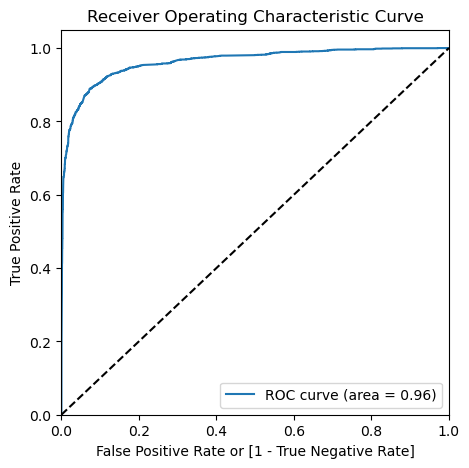

In [149]:
# Drawing ROC curve:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding optimal cut-off points:

In [151]:
# creatING columns with different probability cutoffs:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.067845,302,0,1,0,0,0,0,0,0,0,0,0
1,0,0.012379,6087,0,1,0,0,0,0,0,0,0,0,0
2,0,0.402602,1033,0,1,1,1,1,1,0,0,0,0,0
3,0,0.008788,7656,0,1,0,0,0,0,0,0,0,0,0
4,1,0.993990,3241,1,1,1,1,1,1,1,1,1,1,1


In [152]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.381581     1.000000     0.000000
0.1   0.1  0.811567     0.958814     0.720712
0.2   0.2  0.883388     0.933278     0.852605
0.3   0.3  0.901776     0.908155     0.897840
0.4   0.4  0.910577     0.879325     0.929860
0.5   0.5  0.910734     0.841021     0.953748
0.6   0.6  0.909634     0.818369     0.965947
0.7   0.7  0.903819     0.788303     0.975095
0.8   0.8  0.889989     0.740115     0.982465
0.9   0.9  0.871601     0.677512     0.991360


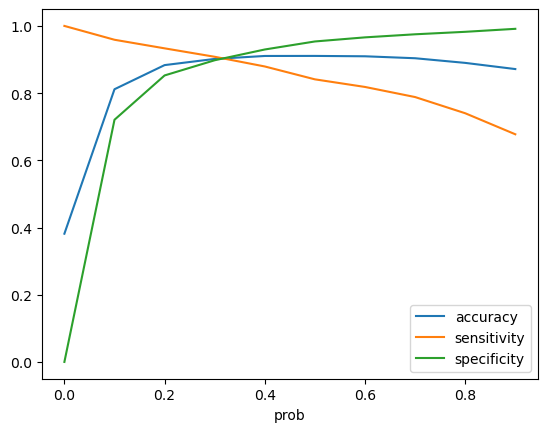

In [153]:
# Plotting accuracy sensitivity and specificity for various probabilities:
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

In [154]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.067845,302,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.012379,6087,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.402602,1033,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.008788,7656,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.993990,3241,1,1,1,1,1,1,1,1,1,1,1,1


In [155]:
# Checking the overall accuracy:
print(metrics.accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Final_Predicted))

0.9017758918749018


In [156]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Final_Predicted)
confusion


array([[3533,  402],
       [ 223, 2205]], dtype=int64)

### Metrics beyond simple accuracy with 0.3 as optimal cutoff point:

In [158]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [159]:
# Sensitivity of our logistic regression model:
TP / float(TP+FN)

0.908154859967051

In [160]:
# Specificity of our logistic regression model:
TN / float(TN+FP)

0.8978398983481576

In [161]:
# Calculating false postive rate - 
print(FP/ float(TN+FP))

0.10216010165184244


In [162]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8457997698504027


In [163]:
# Negative predictive value
print (TN / float(TN+ FN))


0.9406283280085197


### Precision and Recall:

In [165]:
# Precision Score:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.8457997698504027

In [166]:
# Recall Score
recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.908154859967051

### Precision and Recall Tradeoff:

In [168]:
# Calculating the tradeoff between precision and recall:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

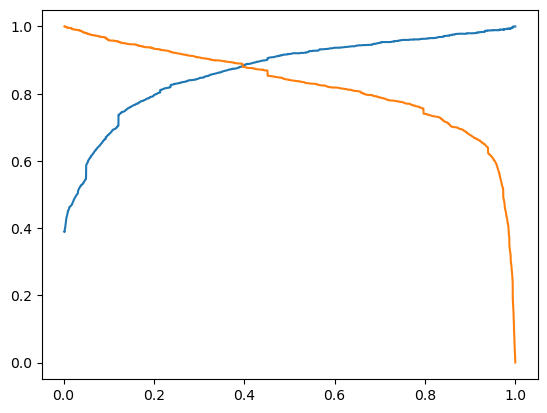

In [169]:
# Plotting precision and recall and finding the tradeoff:
plt.plot(thresholds, p[:-1])
plt.plot(thresholds, r[:-1])
plt.show()

### Make predictions on the test set:

In [171]:
# Scaling the Numerical Variables
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [172]:
# Checking head of test set:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead_Origin_Lead Add Form,Lead_Source_Olark Chat,Lead_Source_Welingak Website,Last_Activity_SMS Sent,Specialization_Travel and Tourism,Occupation_Not Specified,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation
6906,0,1.919395,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1873,0,-0.546142,0,0,0,1,0,0,0,0,1,0,0,0,1,0
771,0,-0.797465,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4495,0,-0.623190,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9061,0,2.392690,0,0,0,0,0,1,0,0,0,1,0,0,1,0


In [173]:
# Adding constant:
X_test_sm = sm.add_constant(X_test)

In [174]:
# Predictions on test set:
y_test_pred = res.predict(X_test_sm)
y_test_pred.head()

6906    0.998022
1873    0.018726
771     0.004199
4495    0.005074
9061    0.164814
dtype: float64

In [175]:
# Converting y_pred to a DataFrame
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
6906,0.998022
1873,0.018726
771,0.004199
4495,0.005074
9061,0.164814


In [176]:
# Converting y_test to DataFrame:
y_test_df = pd.DataFrame(y_test)

In [177]:
# Putting 'Prospect ID' to index:
y_test_df['Prospect ID'] = y_test_df.index

In [178]:
# Removing index for both DataFrames to concatenate them side by side:
y_pred_1.reset_index(drop= True, inplace= True)
y_test_df.reset_index(drop= True, inplace= True)

In [179]:
# Concatenating y_test_df and y_pred_1:
y_pred_final = pd.concat([y_test_df, y_pred_1], axis = 1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,6906,0.998022
1,0,1873,0.018726
2,0,771,0.004199
3,0,4495,0.005074
4,1,9061,0.164814


In [180]:
# Renaming the column:
y_pred_final = y_pred_final.rename(columns = {0: 'Converted_Prob'})

In [181]:
# Rearranging the columns:
y_pred_final = y_pred_final[['Prospect ID', 'Converted', 'Converted_Prob']]
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,6906,1,0.998022
1,1873,0,0.018726
2,771,0,0.004199
3,4495,0,0.005074
4,9061,1,0.164814


In [182]:
# Adding the final predicted column:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Final_Predicted
0,6906,1,0.998022,1
1,1873,0,0.018726,0
2,771,0,0.004199,0
3,4495,0,0.005074,0
4,9061,1,0.164814,0


In [183]:
# Overall Accuracy:
metrics.accuracy_score(y_true= y_pred_final.Converted, y_pred= y_pred_final.Final_Predicted)

0.9094242757609095

In [184]:
# Confusion Matrix:
confusion2 = metrics.confusion_matrix(y_true= y_pred_final.Converted, y_pred= y_pred_final.Final_Predicted)
confusion2

array([[1505,  155],
       [  92,  975]], dtype=int64)

In [185]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [186]:
# Sensitivity of our logistic regression model:
TP / float(TP+FN)

0.9137769447047798

In [187]:
# Specificity of our logistic regression model:
TN / float(TN+FP)

0.9066265060240963

In [188]:
# CalculatING false postive rate:
print(FP/ float(TN+FP))

0.09337349397590361


In [189]:
# Positive predictive value :
print (TP / float(TP+FP))

0.8628318584070797


In [190]:
# Negative predictive value:
print (TN / float(TN+ FN))

0.9423919849718222


In [191]:
# Precision Score:
precision_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.8628318584070797

In [192]:
# Recall Score
recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.9137769447047798

### Assigned lead score to testing the data:

In [194]:
# Assigning lead scores:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Final_Predicted,Lead_Score
0,6906,1,0.998022,1,100
1,1873,0,0.018726,0,2
2,771,0,0.004199,0,0
3,4495,0,0.005074,0,1
4,9061,1,0.164814,0,16


-  <b>The customers whose lead score is equal to or more than 85 should be contacted. They are termed as Hot Leads<B>

In [196]:
# Customers whose lead score is equal to or more than 85.
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_Prob,Final_Predicted,Lead_Score
0,6906,1,0.998022,1,100
9,7008,1,0.968745,1,97
11,3074,1,0.977028,1,98
13,6163,1,0.972033,1,97
16,6482,1,0.845816,1,85
...,...,...,...,...,...
2716,309,1,0.893479,1,89
2717,9234,1,0.931237,1,93
2718,8028,1,0.939947,1,94
2719,5807,1,0.994227,1,99


-  <b>There are 787 leads which can be contacted and have a high chance of getting converted.<b>

### FINDING IMPORTANT FEATURES FROM OUR FINAL MODEL:

In [198]:
# Important features from our final model:
res.params.sort_values(ascending=False)

Tags_Closed by Horizzon                          4.882959
Lead_Source_Welingak Website                     3.547592
Tags_Will revert after reading the email         2.935875
Lead_Origin_Lead Add Form                        1.988597
Last_Activity_SMS Sent                           1.559959
Lead_Source_Olark Chat                           1.139687
Total Time Spent on Website                      1.091437
const                                           -0.367184
Last_Notable_Activity_Modified                  -0.974779
Specialization_Travel and Tourism               -1.037732
Tags_Other Tags                                 -1.107197
Do Not Email                                    -1.423380
Last_Notable_Activity_Olark Chat Conversation   -1.445328
Occupation_Not Specified                        -1.785150
Tags_Interested in other courses                -3.580875
Tags_Ringing                                    -4.231204
Tags_Already a student                          -4.459881
dtype: float64

### CONCLUSION:

<b>Logistic regression model is used to predict the probability of conversion of a customer<b>

-  <b> Top three variable are: Tags will revert after reading the mail<b>
-  <b> Tags closed by horizon<b>
-  <b> Last activity SMS sent<b>